In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("./data.csv", encoding="iso-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.describe().T  # T Does Transpose

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
df.describe(exclude=["int64", "float64"])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


# Dropping null 

In [9]:
df.dropna(inplace=True)
df.shape

(406829, 8)

# Dropping -ve Quantity

In [10]:
df.drop(df[df["Quantity"] < 0].index, inplace=True)

In [11]:
df.shape

(397924, 8)

In [12]:
df[df["UnitPrice"] < 0].shape

(0, 8)

# Creating Sales Data

In [13]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [14]:
sales_data = df.groupby("CustomerID")["Sales"].sum().reset_index()
sales_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [15]:
type(sales_data)

pandas.core.frame.DataFrame

# Calculating No. Of Transactions

In [16]:
transaction_number = df.groupby("CustomerID")["InvoiceNo"].count().reset_index()
transaction_number

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


# Calculating Last Transaction

In [17]:
df["InvoiceDate"]

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 397924, dtype: object

In [18]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [19]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

## Last Date

In [20]:
df["Last Transaction"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days
# .dt.days -> Only Days

In [21]:
df["Last Transaction"]

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: Last Transaction, Length: 397924, dtype: int64

In [22]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales', 'Last Transaction'],
      dtype='object')

In [23]:
last_transaction = (
    df.groupby(["CustomerID", "Country"])["Last Transaction"].max().reset_index()
)
last_transaction

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


# Merging Tables to get Important Data Only

In [24]:
merged_data = pd.merge(last_transaction, sales_data, how="inner", on="CustomerID")
new_df = pd.merge(transaction_number, merged_data, how="inner", on="CustomerID")
new_df.head()

,CustomerID,InvoiceNo,Country,Last Transaction,Sales
0,12346.0,1,United Kingdom,325,77183.60
1,12347.0,182,Iceland,366,4310.00
2,12348.0,31,Finland,357,1797.24
3,12349.0,73,Italy,18,1757.55
4,12350.0,17,Norway,309,334.40


In [25]:
new_df.shape

(4347, 5)

# Removal Of Outliers

<Axes: >

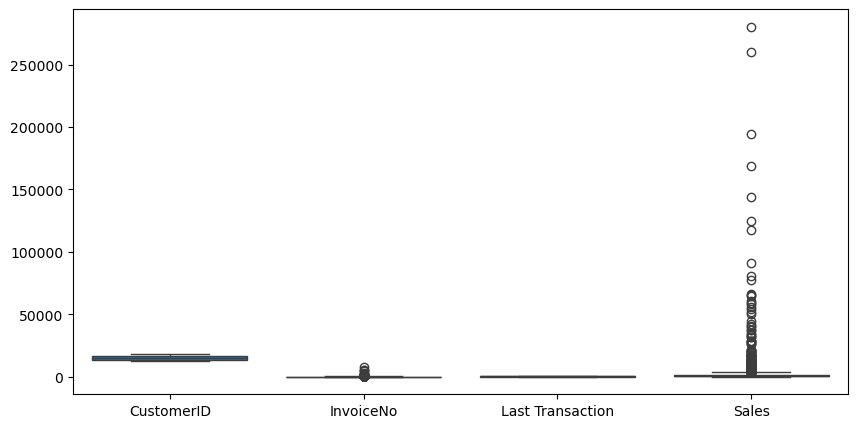

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(new_df)

In [27]:
# Outlier Removal IQR Method
Q1 = np.percentile(new_df["Sales"], 25)
Q3 = np.percentile(new_df["Sales"], 75)
IQR = Q3 - Q1
lowerWhisker = Q1 - 1.5 * IQR
upperWhisker = Q3 + 1.5 * IQR
mask = (new_df["Sales"] >= lowerWhisker) & (new_df["Sales"] <= upperWhisker)

new_df = new_df[mask]
new_df.shape

(3923, 5)

<Axes: >

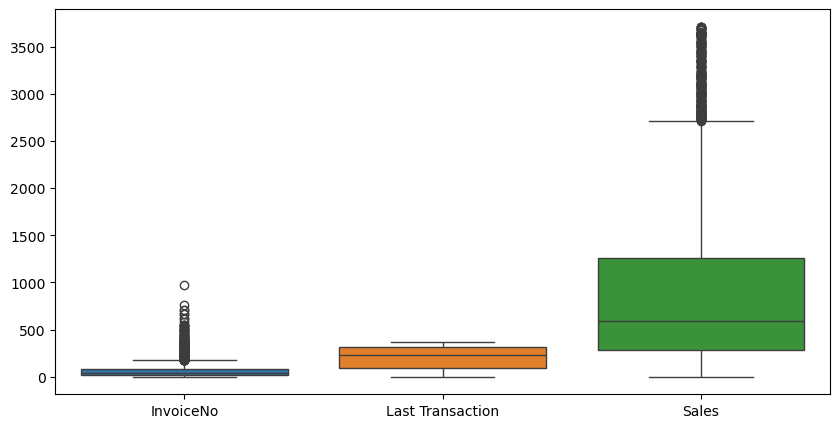

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(new_df[["InvoiceNo", "Last Transaction", "Sales"]])

In [29]:
new_df.reset_index(drop=True, inplace=True)

In [30]:
new_df.columns

Index(['CustomerID', 'InvoiceNo', 'Country', 'Last Transaction', 'Sales'], dtype='object')

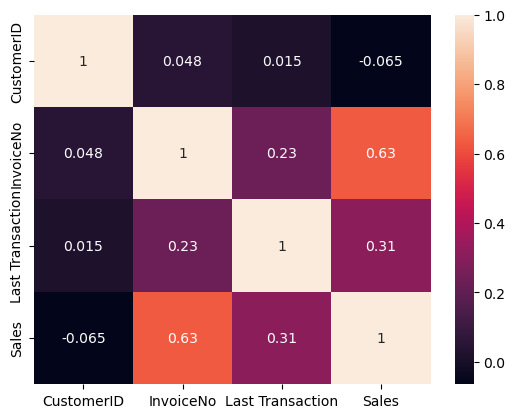

In [31]:
sns.heatmap(
    new_df[["CustomerID", "InvoiceNo", "Last Transaction", "Sales"]].corr(),
    annot=True,
)
plt.show()

# Normalization With MinMaxScaler

In [32]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_df, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_df = train_data[["InvoiceNo", "Last Transaction", "Sales"]]
test_data_df = test_data[["InvoiceNo", "Last Transaction", "Sales"]]

train_data_scaled = scaler.fit_transform(train_data_df)
test_data_scaled = scaler.transform(test_data_df)

train_data_scaled = pd.DataFrame(train_data_scaled)
test_data_scaled = pd.DataFrame(test_data_scaled)

train_data_scaled.columns = test_data_scaled.columns = [
    "InvoiceNo",
    "Last Transaction",
    "Sales",
]

train_data_scaled["Country"] = train_data["Country"]
test_data_scaled["Country"] = test_data["Country"]
train_data_scaled.head()

,InvoiceNo,Last Transaction,Sales,Country
0,0.259603,0.873995,0.610253,Finland
1,0.005298,0.077748,0.020691,Italy
2,0.037086,0.742627,0.219162,Norway
3,0.125828,0.737265,0.372647,Norway
4,0.096689,0.638070,0.341139,Bahrain


# KMeans Clustering

In [34]:
from sklearn.cluster import KMeans

df_KMeans = train_data_scaled.drop(columns=["Country"], axis=1)

In [35]:
!pip install yellowbrick

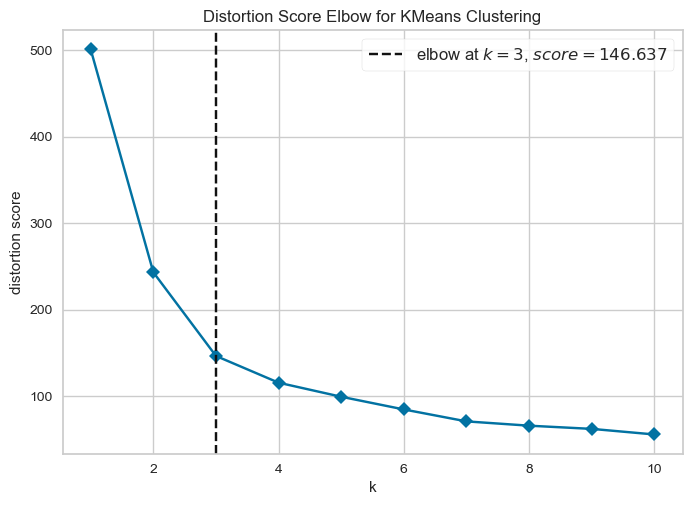

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
# Elbow Line 1 to 10
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(df_KMeans)
visualizer.show()
# Here Score Is WCSS -> Within Cluster Summation of Sqaures

In [37]:
from sklearn.cluster import KMeans

# Less Clusters Better Model
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df_KMeans)
df_KMeans["Clusters"] = y_pred
df_KMeans

,InvoiceNo,Last Transaction,Sales,Clusters
0,0.259603,0.873995,0.610253,2
1,0.005298,0.077748,0.020691,1
2,0.037086,0.742627,0.219162,0
3,0.125828,0.737265,0.372647,0
4,0.096689,0.638070,0.341139,0
...,...,...,...,...
3133,0.017219,0.150134,0.043376,1
3134,0.000000,0.439678,0.013740,1
3135,0.074172,0.412869,0.223028,1
3136,0.112583,0.766756,0.485728,2


In [38]:
kmeans.cluster_centers_  # 3CLusters and 3 Features

array([[0.05386023, 0.77260986, 0.15650963],
       [0.05211072, 0.21832915, 0.149917  ],
       [0.20319933, 0.80487483, 0.63435093]])

# Model Evaluation
# Silhouette Score

In [39]:
kmeans.labels_  # Gives Cluster Values

array([2, 1, 0, ..., 1, 2, 0], dtype=int32)

In [40]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_KMeans, kmeans.labels_, metric="euclidean")
print(score)
# -1 	-> Bad Cluster
# 0 	-> Close To Boundary Between Clusters
# +1	-> Good Cluster

0.7774063727237802


# Hierarchial Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering

hierarchial = AgglomerativeClustering(n_clusters=3)
y_pred_hierarchial = hierarchial.fit_predict(df_KMeans)
df_KMeans["Clusters_Hierarchial"] = y_pred_hierarchial
df_KMeans

,InvoiceNo,Last Transaction,Sales,Clusters,Clusters_Hierarchial
0,0.259603,0.873995,0.610253,2,2
1,0.005298,0.077748,0.020691,1,1
2,0.037086,0.742627,0.219162,0,0
3,0.125828,0.737265,0.372647,0,0
4,0.096689,0.638070,0.341139,0,0
...,...,...,...,...,...
3133,0.017219,0.150134,0.043376,1,1
3134,0.000000,0.439678,0.013740,1,1
3135,0.074172,0.412869,0.223028,1,1
3136,0.112583,0.766756,0.485728,2,2


# Silhouette Score (Hierarchial Clustering)

In [42]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_KMeans, hierarchial.labels_, metric="euclidean")
print(score)

0.8295065469359568


# DBSCAN
- Density Based Spatial Clustering of Application With Noise

In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(df_KMeans)
df_KMeans["Cluster_DBSCAN"] = y_pred_dbscan
df_KMeans

,InvoiceNo,Last Transaction,Sales,Clusters,Clusters_Hierarchial,Cluster_DBSCAN
0,0.259603,0.873995,0.610253,2,2,0
1,0.005298,0.077748,0.020691,1,1,1
2,0.037086,0.742627,0.219162,0,0,2
3,0.125828,0.737265,0.372647,0,0,2
4,0.096689,0.638070,0.341139,0,0,2
...,...,...,...,...,...,...
3133,0.017219,0.150134,0.043376,1,1,1
3134,0.000000,0.439678,0.013740,1,1,1
3135,0.074172,0.412869,0.223028,1,1,1
3136,0.112583,0.766756,0.485728,2,2,0


In [46]:
from sklearn.metrics import silhouette_score

score_dbscan = silhouette_score(df_KMeans, dbscan.labels_, metric="euclidean")
print(score_dbscan)

0.856425786997458
